## General

In [34]:
# Import libraries
import sys
import string
import random
import numpy as np
import networkx as nx
from numpy import linalg as LA
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

## Load Map

In [2]:
# Load map
map_ = np.loadtxt("simple-map-dungeon.txt").astype(int)

## Graph Creation (NetworkX)

In [3]:
# Create graph instance
G = nx.Graph()

# Populate graph by creating
# edges between neighbours
for y in range(map_.shape[0]):
    for x in range(map_.shape[1]):
        # Skip iteration if obstacle
        if map_[y,x]:
            continue
        
        # Add edge to non-obstacle element to the right
        if y+1 < map_.shape[0] and map_[y+1,x] == 0:
            G.add_edge((x,y),(x,y+1))
        
        # Add edge to non-obstacle element to the left
        if y-1 >= 0 and  map_[y-1,x] == 0:
            G.add_edge((x,y),(x,y-1))
        
        # Add edge to non-obstacle element to the bottom
        if x+1 < map_.shape[1] and  map_[y,x+1] == 0:
            G.add_edge((x,y),(x+1,y))
        
        # Add edge to non-obstacle element to the top
        if x-1 >= 0 and  map_[y,x-1] == 0:
            G.add_edge((x,y),(x-1,y))

## Source-Target Distances

In [4]:
# Compute dictionary of distances
# between any node and any other one
D = nx.shortest_path(G)

## K-medoids clustering

In [5]:
# Global variables
K = 4
TMAX = 100

# Medoids list
medoids = []

# Pick randomly medoids
# among the nodes of the
# graph
for i in range(K):
    medoids.append(random.choice(list(G.nodes())))

# Iterate over tmax
for epoch in range(TMAX):
    # Medoids clusters
    k_med_clusters = [set() for _ in range(K)]
    
    # Populate clusters for
    # each medoid set
    for node in G.nodes():
        # Temp variables to
        # keep track of closest
        # medoids
        best_idx = None
        best_medoid = None
        min_distance = np.inf
        
        # Iterate over medoids
        for idx, medoid in enumerate(medoids):
            # Fetch shortest path distance
            distance = len(D[node][medoid])
            
            # Update min distance
            # and respective closest
            # medoid
            if distance < min_distance:
                best_idx = idx
                best_medoid = medoid
                min_distance = distance
        
        # Add vertex to closest cluster
        k_med_clusters[best_idx].add(node)

    # Update medoid based on updated clusters
    for idx, k_med_cluster in enumerate(k_med_clusters):
        # Temp variables
        best_medoid = None
        min_distance = np.inf
        
        # Iterate over ith cluster
        for node_j in k_med_cluster:
            # Compute sum distance for each
            # cluster points with respect to
            # all other points in the cluster
            sum_distance = sum(len(D[node_j][node_l]) for node_l in k_med_cluster)
            
            # Update min distance and
            # respective best medoid
            if sum_distance < min_distance:
                best_medoid = node_j
                min_dist = sum_distance
        
        # Update medoid
        medoids[idx] = best_medoid  

## K-Medoids Clustering

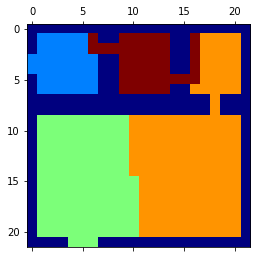

In [6]:
# Medoids cluster map
medoids_cluster = map_.copy()

# Loop over map and set cluster k
for y in range(map_.shape[0]):
    for x in range(map_.shape[1]):
        # Check if entry is free
        if map_[y,x] == 0:
            # Check which cluster it belongs to
            for idx, k_med_cluster in enumerate(k_med_clusters):
                if (x,y) in k_med_cluster:
                    medoids_cluster[y, x] = idx + 1
        else:
            medoids_cluster[y, x] = 0

plt.matshow(medoids_cluster, cmap='jet', interpolation='nearest')
plt.show()

## Spectral Clustering

In [39]:
# Compute adjacency matrix
A = nx.adjacency_matrix(G).todense()

# Create degree matrix
D = np.zeros((A.shape[0], A.shape[1]))

# Populate degree matrix
for y in range(A.shape[0]):
    degree = 0
    for x in range(A.shape[1]):
        degree += A[y,x]
    
    # Update degree for node y
    D[y, y] = degree

# Compute the laplacian graph
L = D - A

# Perform EigenValue Decomposition
w, v = LA.eigh(L)

# Sort eigenvalues and eigenvectors
sort_idx = w.argsort() 
# w = w[sort_idx]
# v = v[sort_idx]
print(sort_idx)

# Fetch the first K eigenvectors
v_k = v[:, 1:K+1]

# Select randomly k clusters
centroids = []
for _ in range(K):
    # Get random choice input
    choice = random.choice(v_k)
    
    # Populate clusters
    centroids.append(np.array(choice)[0].tolist())

print("Initial centroids: ", centroids)

# Perform k-means on data points
for _ in range(10):
    # Clusters as a list of lists
    k_mean_clusters = [[] for _ in range(K)]
    
    # Iterate over datapoints
    for x in range(v_k.shape[0]):
        # Temp variables
        best_idx = None
        min_distance = np.inf
        best_centroid = None
        
        # Iterate over clusters
        for idx, centroid in enumerate(centroids):
            # Compute euclidean distance
            # between node and centroid
            distance = np.linalg.norm(np.array(v_k[x])[0].tolist() - np.array(centroid))
            
            # Get best centroid for
            # datapoint in the spectrals
            if  distance < min_distance:
                best_idx = idx
                min_distance = distance
                best_centroid = centroid
            
        # Add node to respective cluster
        k_mean_clusters[best_idx].append(np.array(v_k[x]))
        
    # Update centroids
    for i, cluster in enumerate(k_mean_clusters):
        # Temp variable
        sum_ = np.asarray([0.0,0.0,0.0,0.0])
        
        # Loop over points in ith cluster
        for point in cluster:
            sum_ += point[0].tolist()
        
        # Update centroid as mean
        centroids[i] = sum_ / len(cluster)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

## Spectral Clustering

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 4 4 4 4 4 0 0 3 3 3 3 3 0 0 2 2 2 2 2 0]
 [0 4 4 4 4 4 4 4 3 3 3 3 3 3 0 0 2 2 2 2 2 0]
 [4 4 4 4 4 4 4 0 0 3 3 3 3 3 0 0 2 2 2 2 2 0]
 [4 4 4 4 4 4 4 0 0 3 3 3 3 3 0 0 2 2 2 2 2 0]
 [0 4 4 4 4 4 4 0 0 3 3 3 3 3 3 2 2 2 2 2 2 0]
 [0 4 4 4 4 4 4 0 0 3 3 3 3 3 0 0 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 1 1

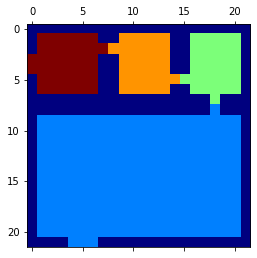

In [29]:
# List of nodes
nodes = list(G.nodes())

# Copy of original map
map_clustered = np.zeros_like(map_)

# Iterate over all clusters
for idx, k_mean_cluster in enumerate(k_mean_clusters):
    # Iterate over all points in the cluster
    for point in k_mean_cluster:
        # Find where point matches
        i, _ = np.where(np.isclose(v_k, point).all(axis=1))
#         print(i)
                
        # Get corresponding i,j in map for match
        x,y = nodes[i[0]]
        
#         print(y,x)
        
        # Update map
        map_clustered[y,x] = idx + 1

print(map_clustered)
# print(k_mean_clusters)

plt.matshow(map_clustered, cmap='jet', interpolation='nearest')
plt.show()